# AM 207 Pset 3

## Spencer Hallyburton

## Collaborator: Salvador Barragan

In [1]:
# Up-front things
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
import math

# Seed a random number generator
np.random.seed(99)


# Problem 1: Optimization via Descent

Given this loss function for a point (x,y):
$$
L(x, y, \lambda_1, \lambda_2) = 0.000045\lambda_2^2 y - 0.000098\lambda_1^2 x + 0.003926\lambda_1 x\exp\left\{\left(y^2 - x^2\right)\left(\lambda_1^2 + \lambda_2^2\right)\right\}
$$
We need to implement methods to determine our parameters that minimze the loss function over a set of data.

In [2]:
my_data = np.genfromtxt('HW3_data.csv', delimiter=',')
print('Data Shape:', my_data.shape)

Data Shape: (2, 16000)


### Part A.1: Visualize Minimum

In [3]:
# Set up functions
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, LAMBDA):
    T1 =  .000045*LAMBDA[1]**2 * Y 
    T2 = -.000098*LAMBDA[0]**2 * X
    T3 =  .003926*LAMBDA[0] * X * np.exp( (Y**2 - X**2) * (LAMBDA[0]**2 + LAMBDA[1]**2) )
    return np.sum(T1 + T2 + T3)

def make_3d_plot(xfinal, yfinal, zfinal, history, loss, X, Y):
    L1s = np.linspace(xfinal - 10 , xfinal + 10, 40)
    L2s = np.linspace(yfinal - 10 , yfinal + 10, 40)
    L1, L2 = np.meshgrid(L1s, L1s)
    zs = np.array([error(X, Y, LAMBDA) 
                   for LAMBDA in zip(np.ravel(L1), np.ravel(L2))])
    Z = zs.reshape(L1.shape)
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    off = -10
    ax.plot_surface(L1, L2, Z, rstride=1, cstride=1, color='b', alpha=0.1)
    ax.contour(L1, L2, Z, 20, alpha=0.5, offset=off, stride=30)
    ax.set_xlabel('Lambda 1')
    ax.set_ylabel('Lambda 2')
    ax.set_zlabel('Loss Function')
    ax.view_init(elev=30., azim=30)
    ax.plot([xfinal], [yfinal], [zfinal] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
    ax.plot([t[0] for t in history], [t[1] for t in history], loss , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=5);
    ax.plot([t[0] for t in history], [t[1] for t in history], off , alpha=0.5, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=5)
    plt.show()
    
def gd_plot(X, Y, LAMBDA, loss, history):
    if not isinstance(loss, list):
        loss = [loss]
    make_3d_plot(LAMBDA[0], LAMBDA[1], loss[-1], history, loss, X, Y)
    

Cost given optimal Lambda: -9.93410402544


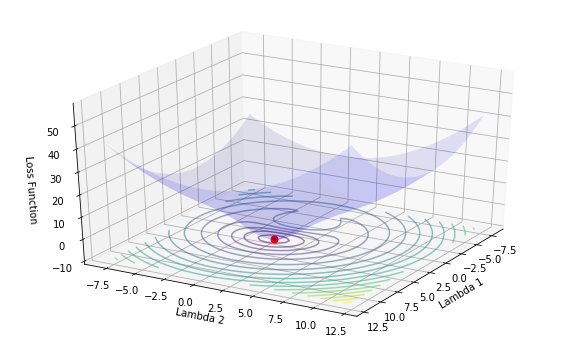

In [4]:
# Test out a lambda point:
LAM_optimal = [2.05384, 0]
cost_optimal = error(my_data[0,:], my_data[1,:], LAM_optimal)
history = [LAM_optimal]
print('Cost given optimal Lambda:', cost_optimal)
gd_plot(my_data[0,:], my_data[1,:], LAM_optimal, cost_optimal, history)

Given that we have an analytic equation for the cost function, we can compute the gradient function by differentiating our cost function with respect to the parameters, $\lambda_1$ and $\lambda_2$. Doing so yields the following gradient function:

### Part A.2: Gradient Descent Learning

In [5]:
# Implementing Gradient Descent:
def grad_fun(x, y, LAM):
    A = .000045
    B = -.000098
    C = .003926
    EXPONENT = np.exp((y**2-x**2) * (LAM[0]**2 + LAM[1]**2))
    dLd1 = 2*B*LAM[0]*x + C*x*EXPONENT + C*LAM[0]*x*((y**2-x**2)*2*LAM[0])*EXPONENT
    dLd2 = 2*A*LAM[1]*y + C*LAM[0]*x*((y**2-x**2)*2*LAM[1])*EXPONENT
    
    return [np.sum(dLd1), np.sum(dLd2)]
    
    
def gradient_descent(x, y, LAM_init, step=0.001, maxsteps=0, precision=0.00001):
    costs = []
    m = y.size # number of data points
    LAM = LAM_init
    history = [] # to store all thetas
    counter = 0
    oldcost = 0
    currcost = error(x, y, LAM)
    counter+=1
    while abs(currcost - oldcost) > precision:
        oldcost=currcost
        gradient = np.asarray(grad_fun(x, y, LAM))
        
        LAM = LAM - step * gradient  # update
        history.append(LAM)
        
        currcost = error(x, y, LAM)
        costs.append(currcost)
        
        if counter % 200 == 0: print('COST @ %i = %.4f' % (counter, currcost))
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, counter

In [6]:
# Perform gradient descent calculation:
LAM_init = [5, 5] + np.random.rand(2)
print('Initial Guess of Lambda:', LAM_init)
history, costs, counter = gradient_descent(my_data[0,:], my_data[1,:], LAM_init)
print('Iterations:', counter)
print('Final Lambda:', history[-1])

Initial Guess of Lambda: [ 5.67227856  5.4880784 ]
COST @ 200 = 10.2739
COST @ 400 = 8.2501
COST @ 600 = 6.0909
COST @ 800 = 3.5298
COST @ 1000 = 0.2670
COST @ 1200 = -3.5773
COST @ 1400 = -6.8527
COST @ 1600 = -8.6833
COST @ 1800 = -9.4633
COST @ 2000 = -9.7618
COST @ 2200 = -9.8717
COST @ 2400 = -9.9116
COST @ 2600 = -9.9260
COST @ 2800 = -9.9312
Iterations: 2880
Final Lambda: [ 2.05391499  0.03900447]


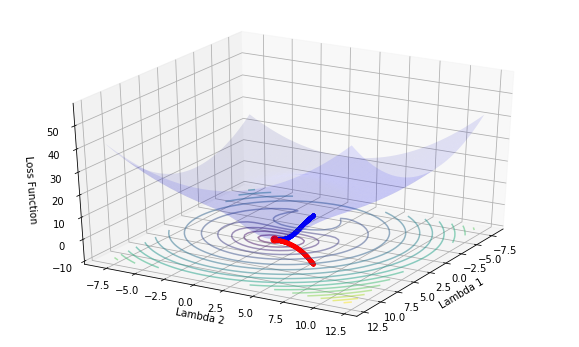

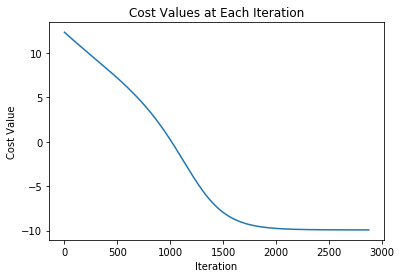

In [7]:
# Visualize Gradient Descent:
gd_plot(my_data[0,:], my_data[1,:], history[-1], costs, history)

# Plotting Cost Reduction
plt.plot(range(len(costs)), costs);
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.title('Cost Values at Each Iteration')
plt.show()

### Part A.3 Stochastic Gradient Descent

In [18]:
def sgd_minibatch(x, y, LAM, batchsize=1, step=0.001, maxsteps=0, maxepochs=0, precision=0.001):
    m = y.size # number of data points
    costs = []
    history = []
    grads = []
    costsum = 0
    costsum2 = 0
    counter = 0
    currcost = 0
    oldcost = 0
    i = 0
    counter+=1
    
    # Shuffle the data
    neworder = np.random.permutation(m)
    xdata_shuf = x[neworder]     
    ydata_shuf = y[neworder]
        
    # Print Status
    print('Performing SGD With Batchsize =', batchsize)
    epoch = 0; print('Epoch: ',epoch)
    while 1:
        # Get next batch:
        last_idx = min(m, (i+1)*batchsize)
        xvals = np.asarray(xdata_shuf[i:last_idx])
        yvals = np.asarray(ydata_shuf[i:last_idx])

        # Get the current cost
        oldcost=currcost
        currcost = error(xvals, yvals, LAM)
        costsum += currcost
        costs.append(currcost * m)
        costsum2 += currcost
        
        # Append the last lambda:
        history.append(LAM)

        # Compute gradient
        gradient = np.asarray(grad_fun(xvals, yvals, LAM))
        gradient = gradient * np.sqrt(m)/batchsize
        grads.append(gradient)
        
        # Update Lambda
        LAM = LAM - step * gradient  # update

        # Check if reached the end and need new epoch
        i+=batchsize
        counter+=1
        if i>=m: #reached one past the end
            epoch+=1
            # Shuffle the data
            neworder = np.random.permutation(m)
            xdata_shuf = x[neworder]     
            ydata_shuf = y[neworder] 
            print('Epoch: ', epoch, 'Cost:', costsum2)
            costsum2 = 0
            i=0

        # Check if max steps reached
        if maxsteps:
            if counter == maxsteps:
                print('Max Steps Reached')
                break
        
        # Check if max epochs reached
        if maxepochs:
            if epoch == maxepochs:
                print('Max Epochs Reached')
                break
                
    print('Tolerance At End:', abs(currcost - oldcost))
        
    return history, costs, counter, counter, epoch, grads


In [19]:
# Perform calculation
batchsize=1
LAM_init = [5, 5]
history2, costs2, counter2, iters2, epoch2, grads2 = sgd_minibatch(my_data[0,:], my_data[1,:], LAM_init, 
                                                   batchsize, maxepochs=20, step=.001)

Performing SGD With Batchsize = 1
Epoch:  0
Epoch:  1 Cost: 13.7172061841
Epoch:  2 Cost: 12.4379390541
Epoch:  3 Cost: 11.4022397582
Epoch:  4 Cost: 10.6141622992
Epoch:  5 Cost: 9.38553566859
Epoch:  6 Cost: 8.8273953955
Epoch:  7 Cost: 7.80061217554
Epoch:  8 Cost: 6.92050792671
Epoch:  9 Cost: 5.8827570065
Epoch:  10 Cost: 3.88163796541
Epoch:  11 Cost: 3.31989120509
Epoch:  12 Cost: 2.16569999705
Epoch:  13 Cost: -0.328462626387
Epoch:  14 Cost: -3.08084875441
Epoch:  15 Cost: -7.93157405458
Epoch:  16 Cost: -9.44771995541
Epoch:  17 Cost: -9.82036524628
Epoch:  18 Cost: -9.91332700738
Epoch:  19 Cost: -9.92803178082
Epoch:  20 Cost: -9.9332771951
Max Epochs Reached
Tolerance At End: 0.0819651109471


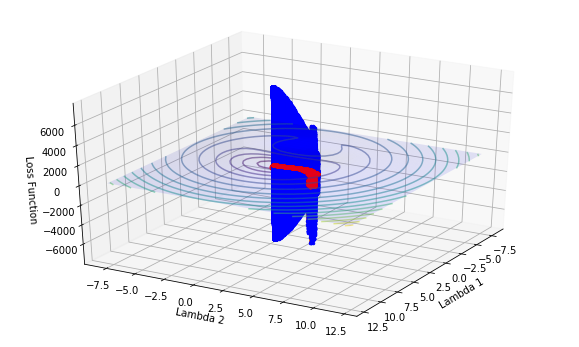

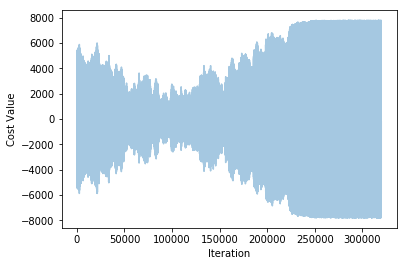

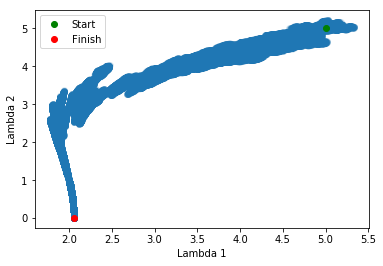

In [20]:
# Visualize Output SGD Plots
gd_plot(my_data[0,:], my_data[1,:], history2[-1], costs2, history2)

# Costs
plt.plot(range(len(costs2)), costs2, alpha=0.4);
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

# Parameters
plt.plot([t[0] for t in history2], [t[1] for t in history2],'o-', alpha=0.1)
plt.plot(history2[0][0], history2[0][1], 'go', label='Start')
plt.plot(history2[-1][0], history2[-1][1], 'ro', label='Finish')
plt.xlabel('Lambda 1')
plt.ylabel('Lambda 2')
plt.legend()
plt.show()


# Problem 2: SGD For Multinomial Logistic Regression

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.autograd import Variable


In [12]:
import torchvision.datasets as dset
root = './data'

# Perform image transfers on the input data
trans = transforms.Compose(
    [transforms.ToTensor(), 
])

batch = 64
# Load training and testing data
trainset = dset.MNIST(root, train=True, transform=trans, target_transform=None, download=False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch,
                                          shuffle=True, num_workers=2)

testset = dset.MNIST(root, train=False, transform=trans, target_transform=None, download=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch,
                                         shuffle=False, num_workers=2)


### Part 1) Plotting 10 Sample Images

Test Tensor Size: torch.Size([64, 1, 28, 28])
    1     0     6     7     8     7     8     7     4     0


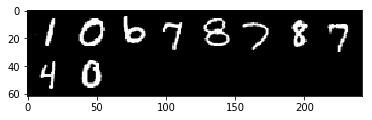

Process Process-1:
Process Process-2:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 342, in get
    res = self._reader.recv_bytes()
  File "/anaconda3/lib/python3.6/multiprocessing/queues.py", line 

In [13]:
#NOTE: Inspiration for this methodology was taken from the PYTORCH tutorials at http://pytorch.org/tutorials/

import matplotlib.pyplot as plt
import numpy as np

# Define a show image function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
imsize = images.size(2)
numclasses = 10

# show images
numprint = 10
print('Test Tensor Size:', images.size())
imshow(torchvision.utils.make_grid(images[0:numprint]))

# print labels
print(' '.join('%5s' % labels[j] for j in range(images[0:numprint].size(0))))

### Part 2: Softmax formulation - Multinomial Regression


In [14]:
# Create model class
class Model(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(imsize**2, numclasses)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        # Reshape the size of the variables
        x = x.view(x.size(0), -1)
        
        y_pred = self.linear(x)
        y_out = F.softmax(y_pred, dim=0)
        return y_out

In [15]:
# our model
model = Model()

# Establish loss function and optimizing algorithm
criterion = torch.nn.CrossEntropyLoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_total = []
# Training loop
for epoch in range(10):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics and concatenate loss normalized by size of batch
        loss_total.append(loss.data[0]/len(labels))
        
        # Add total loss
        running_loss += loss.data[0]
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
    

Process Process-3:
Process Process-4:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 42, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 42, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/site-packages/torchvision-0.2.0-py3.6.egg/torchvision/datasets/mnist.py", lin

KeyboardInterrupt: 

### Part 4: Plot the cross-entropy loss on training set as a function of iteration

In [ ]:
plt.plot(loss_total)
plt.xlabel('Iteration')
plt.ylabel('Loss Value')
plt.title('Evolution of the Loss Function')
plt.show()

In [ ]:
# After training, run predictions
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[0:numprint]))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(numprint)))

In [ ]:
outputs = model(Variable(images))

_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j]
                              for j in range(numprint)))

### 4. Training and test set accuracies

In [ ]:
# Training Set:
correct_tr = 0
total_tr = 0
for data in trainloader:
    images, labels = data
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total_tr += labels.size(0)
    correct_tr += (predicted == labels).sum()

# Test set
correct_ts = 0
total_ts = 0
for data in testloader:
    images, labels = data
    outputs = model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total_ts += labels.size(0)
    correct_ts += (predicted == labels).sum()
    
print('Accuracy of the network on the %d train images: %d' % (total_tr ,100 * correct_tr / total_tr))
print('Accuracy of the network on the %d test images: %d' % (total_ts ,100 * correct_ts / total_ts))

In [ ]:
# Show examples of misclassification:
dataiter = iter(testloader)
misclass = 0
im_misclass = torch.Tensor()
pred_mis = []
numprint = 8
while misclass < numprint:
    # Get the next set of data
    images, labels = next(dataiter)
    output = model(Variable(images))
    _, pred = torch.max(output.data, 1)

    # Loop over elements in the set
    for im, lab, pred in zip(images, labels, pred):
        im = im.unsqueeze(0)
        if (not (lab == pred)) & (misclass<numprint):
            im_misclass = torch.cat((im_misclass, im), dim=0)
            pred_mis.append(pred)
            misclass += 1
            
# Show misclassified images:
imshow(torchvision.utils.make_grid(im_misclass))
print('GroundTruth:\n ', ' '.join('%4s' % j for j in pred_mis))


1. Plot 10 sample images from the MNIST dataset (to develop intuition for the feature space).
2. Construct a softmax formulation in PyTorch of multinomial logistic regression with Cross Entropy Loss.
3. Train your model using SGD to minimize the cost function. *Use a batch size of 64, a learning rate $\eta = 0.01$, and 10 epochs*.
4. Plot the cross-entropy loss on the training set as a function of iteration.
5. What are the training and test set accuracies?  
6. Plot some (around 5) examples of misclassifications.

